In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.8], [8.9], [5.2], [4.59], [2.1], [8], [5], [7.5], [5], [4], [8], [5.2], [4.9], [3], [4.7], [4], [4.8], [3.5], [2.1], [4.1]], dtype=np.float32)
y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.3], [2.6], [1.96], [3.13], [1.76], [3.2], [2.1], [1.6], [2.5], [2.2], [2.75], [2.4], [1.8], [1], [2], [1.6], [2.4], [2.6], [1.5], [3.1]], dtype=np.float32)

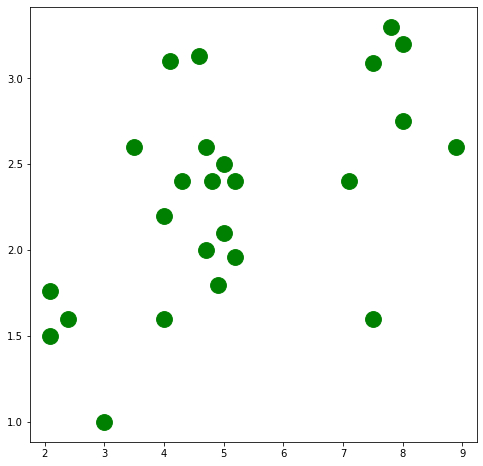

In [3]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='original data')
plt.show()

In [4]:
import torch

# these aren't the learnable parameters of the model -> can continue with the requires_grad set to false
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad - X_train: ', X_train.requires_grad)
print('requires_grad - Y_train: ', Y_train.requires_grad)

requires_grad - X_train:  False
requires_grad - Y_train:  False


In [5]:
input_size = 1
hidden_size = 1
output_size = 1
learning_rate = 0.001

# our neural network has just one x feature and one hidden neuron => shape = [1,1]
w1 = torch.rand(input_size, hidden_size, requires_grad=True)
b1 = torch.rand(hidden_size, output_size, requires_grad=True)

In [9]:
for iter in range(1, 4001):
    # clamp function = activation function
    y_pred = X_train.mm(w1).clamp(min=0).add(b1)

    loss1 = (y_pred - Y_train).pow(2).sum()

    if iter % 100 == 0:
        print(iter, loss.item())

    loss1.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad

        w1.grad.zero_()
        b1.grad.zero_()

100 6.119896411895752
200 6.119896411895752
300 6.119896411895752
400 6.119896411895752
500 6.119896411895752
600 6.119896411895752
700 6.119896411895752
800 6.119896411895752
900 6.119896411895752
1000 6.119896411895752
1100 6.119896411895752
1200 6.119896411895752
1300 6.119896411895752
1400 6.119896411895752
1500 6.119896411895752
1600 6.119896411895752
1700 6.119896411895752
1800 6.119896411895752
1900 6.119896411895752
2000 6.119896411895752
2100 6.119896411895752
2200 6.119896411895752
2300 6.119896411895752
2400 6.119896411895752
2500 6.119896411895752
2600 6.119896411895752
2700 6.119896411895752
2800 6.119896411895752
2900 6.119896411895752
3000 6.119896411895752
3100 6.119896411895752
3200 6.119896411895752
3300 6.119896411895752
3400 6.119896411895752
3500 6.119896411895752
3600 6.119896411895752
3700 6.119896411895752
3800 6.119896411895752
3900 6.119896411895752
4000 6.119896411895752


In [10]:
# the tensor we will feed into our ML model

x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[4.7000],
        [2.4000],
        [7.5000],
        [7.1000],
        [4.3000],
        [7.8000],
        [8.9000],
        [5.2000],
        [4.5900],
        [2.1000],
        [8.0000],
        [5.0000],
        [7.5000],
        [5.0000],
        [4.0000],
        [8.0000],
        [5.2000],
        [4.9000],
        [3.0000],
        [4.7000],
        [4.0000],
        [4.8000],
        [3.5000],
        [2.1000],
        [4.1000]])

In [11]:
# since this is a linear model, all of the values should be in the form of the straight line
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).add(b1)

predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.2273371],
       [1.8246689],
       [2.717542 ],
       [2.6475127],
       [2.1573079],
       [2.7700639],
       [2.9626443],
       [2.3148737],
       [2.208079 ],
       [1.7721468],
       [2.8050785],
       [2.279859 ],
       [2.717542 ],
       [2.279859 ],
       [2.104786 ],
       [2.8050785],
       [2.3148737],
       [2.2623518],
       [1.9297128],
       [2.2273371],
       [2.104786 ],
       [2.2448444],
       [2.0172493],
       [1.7721468],
       [2.1222932]], dtype=float32)

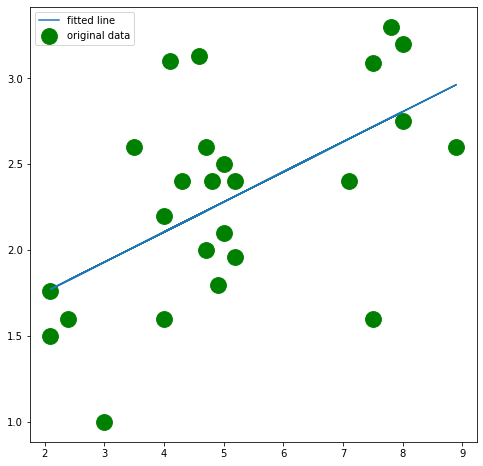

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='original data')
plt.plot(x_train, predicted, label='fitted line')
plt.legend()
plt.show()

In [14]:
# comparision of the hand-crafted model with LinearRegression estimator object that's available in scikit-learn
import sklearn
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)

In [15]:
# values are almost the same as in case of the manual model creation
print("w1 with sklearn is: ", reg.coef_)
print("b1 with sklearn is: ", reg.intercept_)

w1 with sklearn is:  [[0.17507163]]
b1 with sklearn is:  [1.4045022]


In [16]:
predicted = reg.predict(x_train)
predicted

array([[2.2273388],
       [1.8246741],
       [2.7175393],
       [2.6475105],
       [2.1573102],
       [2.770061 ],
       [2.9626396],
       [2.3148746],
       [2.208081 ],
       [1.7721525],
       [2.8050752],
       [2.2798603],
       [2.7175393],
       [2.2798603],
       [2.1047888],
       [2.8050752],
       [2.3148746],
       [2.2623532],
       [1.9297171],
       [2.2273388],
       [2.1047888],
       [2.2448459],
       [2.017253 ],
       [1.7721525],
       [2.1222959]], dtype=float32)

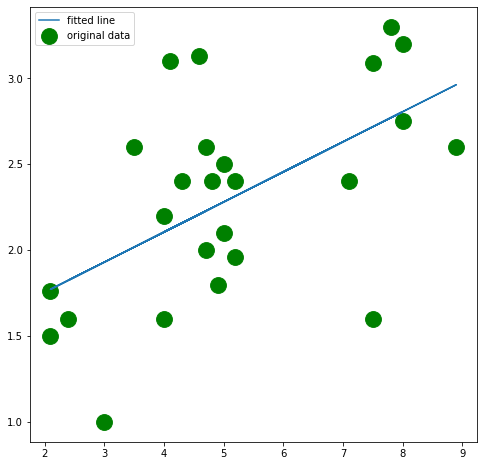

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='original data')
plt.plot(x_train, predicted, label='fitted line')
plt.legend()
plt.show()